Face Recognition :

Step 1 - Upload Image
Step 2 - Detect and crop faces using MTCNN
Step 3 - Feature Extraction using FaceNet
Step 4 - Create a classifier using support vector machine 


Notes :-

1) Data Set used -> 5 Celebrity Faces Dataset from Kaggel
2) Face Detection through MTCNN model
3) Face Embeddings through FaceNet model. In this project I have used pre-trained FaceNet model trained on keras, by Hiroki        Taniai  
4) Classifier -> Support Vector Machine (SVM). Generally 'softmax' classifier is used and its performance is bit better then      SVM, but i had prior knowledge of svm, so I used it.


In [1]:
# Loading the keras FaceNet model

from keras.models import load_model
model = load_model('facenet_keras.h5')

# Summarize input and output shape

print(model.inputs)
print(model.outputs)

Using TensorFlow backend.


[<tf.Tensor 'input_1:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm/cond/Identity:0' shape=(None, 128) dtype=float32>]


C:\Users\Frank\anaconda3\envs\TensorFlow\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [2]:
# Looking at input and output now we know that
# 1) Model expects square color images as input with the shape 160×160, 
# 2) And will give output of a face embedded, as a 128 element vector.

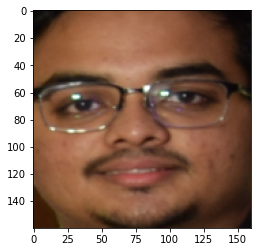

(160, 160, 3)


In [4]:
# Demo, for extracting face(using one of friend image)
# To Detect Faces for Face Recognition using MTCNN

from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

# extracting a single face from a given photograph

def extract_face(filename, required_size=(160, 160)):
    
    # loading image from file
    image = Image.open(filename)
    
    # converting to RGB(sometimes pic is in black and white format)
    image = image.convert('RGB')
    
    # converting to array
    pixels = asarray(image)
    
    # Importing detector, using default weights
    detector = MTCNN()
    
    # detecting faces in the image
    results = detector.detect_faces(pixels)
    
    # extracting the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    
    # bug fixing,as sometimes x1 and y1 values can be negative(taking abosulte value of x1 and y1)
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    # extract the face
    face = pixels[y1:y2, x1:x2]
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# loading the photo and extracting the face
pixels = extract_face('photo_test.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


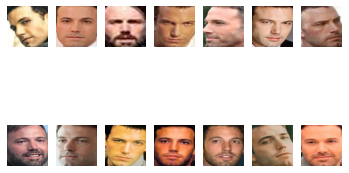

In [5]:
# Using the above code, for face detection on one of, 5 Celebrity Faces Dataset (Ben Affleck) 

from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN


# extracting a single face from a given photograph

def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    
    # converting to RGB
    image = image.convert('RGB')
    
    # converting to array
    pixels = asarray(image)
    
    # creating the detector, using default weights
    detector = MTCNN()
    
    # detecting faces in the image
    results = detector.detect_faces(pixels)
    
    # extracting the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    
    # bug fixing
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    # extract the face
    face = pixels[y1:y2, x1:x2]
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# specifying the image in folder, which is to be plot
folder = '5-celebrity-faces-dataset/train/ben_afflek/'
i = 1

# enumerating file i.e plotting every image in that folder(iteration)
for filename in listdir(folder):
    
    # path
    path = folder + filename
    
    # get face
    face = extract_face(path)
    print(i, face.shape)
    
    # plot
    pyplot.subplot(2, 7, i)
    pyplot.axis('off')
    pyplot.imshow(face)
    i += 1
pyplot.show()

In [8]:
# NOW using same code structure we can detect the all 5 Celebrity Faces in Dataset 

from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    
    # load image from file
    image = Image.open(filename)
    
    # convert to RGB, if needed
    image = image.convert('RGB')
    
    # convert to array
    pixels = asarray(image)
    
    # create the detector, using default weights
    detector = MTCNN()
    
    # detect faces in the image
    results = detector.detect_faces(pixels)
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    # extract the face
    face = pixels[y1:y2, x1:x2]
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# Now loading images and extracting faces for all images in a directory
def load_faces(directory):
    faces = list()
    
    # enumerate files
    for filename in listdir(directory):
        
        # path
        path = directory + filename
        
        # get face
        face = extract_face(path)
        
        # store
        faces.append(face)
    return faces

# Now creating load_dataset() function. This function will take a directory name such as ‘5-celebrity-faces-dataset/train/‘ and
#detects faces for each subdirectory (celebrity name folders), and assigning labels to each detected face.

def load_dataset(directory):
    X, y = list(), list()
    
    # enumerating folders, on per class
    for subdir in listdir(directory):
        
        # path
        path = directory + subdir + '/'
        
        # skip any files that might be in the dir
        if not isdir(path):
            continue
        
        # loading all faces in the subdirectory
        faces = load_faces(path)
        
        # creating labels
        labels = [subdir for _ in range(len(faces))]
        
        # summarizing progress (optional, for my convenient)
        print(f'>loaded {(len(faces))} examples for class: {subdir}')
        
        # store
        X.extend(faces)
        y.extend(labels)
    
    return asarray(X), asarray(y)

# loading train dataset
trainX, trainy = load_dataset('5-celebrity-faces-dataset/train/')
print(trainX.shape, trainy.shape)

# loading test dataset
testX, testy = load_dataset('5-celebrity-faces-dataset/val/')

# saving all arrays to one file in compressed format
savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

>loaded 14 examples for class: ben_afflek
>loaded 17 examples for class: elton_john
>loaded 21 examples for class: jerry_seinfeld
>loaded 19 examples for class: madonna
>loaded 22 examples for class: mindy_kaling
(93, 160, 160, 3) (93,)
>loaded 5 examples for class: ben_afflek
>loaded 5 examples for class: elton_john
>loaded 5 examples for class: jerry_seinfeld
>loaded 5 examples for class: madonna
>loaded 5 examples for class: mindy_kaling


In [10]:
# Now calculating the face embedding for each face in the dataset using FaceNet

from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

# Getting the face embedding for one face

def get_embedding(model, face_pixels):
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    
    # standardize pixel values across channels (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    
    # transform face into one sample(adding one more dimension for keras model to work)
    samples = expand_dims(face_pixels, axis=0)
    
    # make prediction to get embedding
    yhat = model.predict(samples)
    return yhat[0]

# Now loading the face dataset
data = load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

# Loading the facenet model
model = load_model('facenet_keras.h5')
print('Model Loaded')

# Converting each face in the train set to an embedding
newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)

# Converting each face in the test set to an embedding
newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)

# Saving embeddings arrays to one file in compressed format
savez_compressed('5-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)
Model Loaded
(93, 128)
(25, 128)


In [11]:
# Now creating a classifier for the 5 Celebrity Faces Dataset

from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

# load dataset
data = load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

# Normalizing input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# label-encoding targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)

# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=93, test=25
Accuracy: train=100.000, test=100.000
